In [8]:
import pandas as pd
import numpy as np

In [10]:
file_path = r"C:\Users\ASUS\Documents\Dataset ML\fr_dataset_stemmed.xlsx"
df = pd.read_excel(file_path)


In [11]:
print("Data Awal:")
print(df.head())
print("\n" + "="*50 + "\n")

Data Awal:
             category  rating label  \
0  Home_and_Kitchen_5       5    CG   
1  Home_and_Kitchen_5       5    CG   
2  Home_and_Kitchen_5       5    CG   
3  Home_and_Kitchen_5       1    CG   
4  Home_and_Kitchen_5       5    CG   

                                                text  \
0  Love this!  Well made, sturdy, and very comfor...   
1  love it, a great upgrade from the original.  I...   
2  This pillow saved my back. I love the look and...   
3  Missing information on how to use it, but it i...   
4  Very nice set. Good quality. We have had the s...   

                                          clean_text  \
0  Love this  Well made sturdy and very comfortab...   
1  love it a great upgrade from the original  Ive...   
2  This pillow saved my back I love the look and ...   
3  Missing information on how to use it but it is...   
4  Very nice set Good quality We have had the set...   

                                    clean_text_lower  \
0  love this  well made 

In [24]:
from sklearn.model_selection import train_test_split
X_text = df['stemming'].astype(str)
y = df['label']

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text,
    y,
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Jumlah data latih: {len(X_train_text)}")
print(f"Jumlah data uji:  {len(X_test_text)}")
print("-" * 50)

Jumlah data latih: 32345
Jumlah data uji:  8087
--------------------------------------------------


In [38]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB()),
])

parameters = {
    'tfidf__ngram_range': [(1, 1)],  
    'tfidf__min_df': [3, 5],                
    'nb__alpha': [0.1, 0.5, 1.0],           
}

In [40]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)

print("Memulai Hyperparameter Tuning dengan GridSearchCV...")
print("Parameter yang akan diuji:")
print(parameters)

grid_search.fit(X_train_text, y_train)

print("\n--- Tuning Selesai ---")
print(f"Skor F1 terbaik dari hasil cross-validation: {grid_search.best_score_:.4f}")
print("Parameter terbaik yang ditemukan:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
print("-" * 50)

Memulai Hyperparameter Tuning dengan GridSearchCV...
Parameter yang akan diuji:
{'tfidf__ngram_range': [(1, 1)], 'tfidf__min_df': [3, 5], 'nb__alpha': [0.1, 0.5, 1.0]}
Fitting 5 folds for each of 6 candidates, totalling 30 fits

--- Tuning Selesai ---
Skor F1 terbaik dari hasil cross-validation: 0.8565
Parameter terbaik yang ditemukan:
{'nb__alpha': 0.5, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 1)}
--------------------------------------------------



1. Membuat prediksi pada data uji menggunakan MODEL TERBAIK...
   -> Prediksi selesai dibuat.

2. Menghitung dan menampilkan hasil evaluasi akhir...
   -> F1-Score (Weighted) pada Test Set: 0.8531
   -> Akurasi pada Test Set: 0.8532

--- Laporan Klasifikasi Lengkap untuk Model Terbaik ---
              precision    recall  f1-score   support

          CG       0.84      0.88      0.86      4044
          OR       0.87      0.83      0.85      4043

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087


3. Membuat visualisasi Confusion Matrix untuk Model Terbaik...


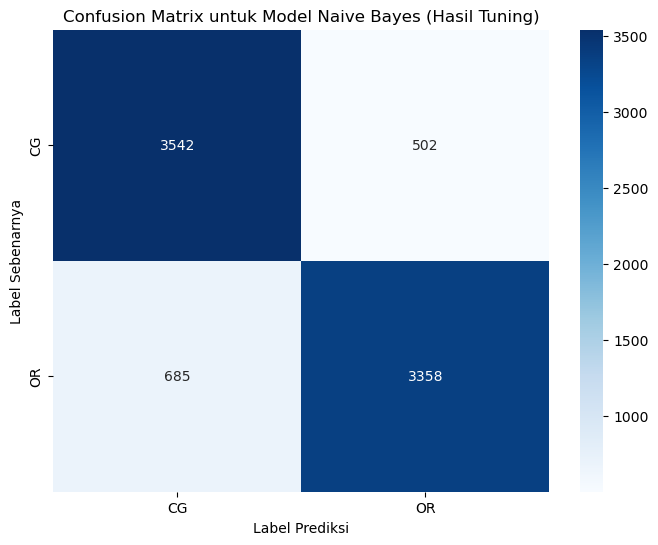

   -> Selesai.


In [42]:
print("\n1. Membuat prediksi pada data uji menggunakan MODEL TERBAIK...")

y_pred = best_model.predict(X_test_text)
print("   -> Prediksi selesai dibuat.")


print("\n2. Menghitung dan menampilkan hasil evaluasi akhir...")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"   -> F1-Score (Weighted) pada Test Set: {f1:.4f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"   -> Akurasi pada Test Set: {accuracy:.4f}")


print("\n--- Laporan Klasifikasi Lengkap untuk Model Terbaik ---")
print(classification_report(y_test, y_pred))


print("\n3. Membuat visualisasi Confusion Matrix untuk Model Terbaik...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_model.classes_, 
            yticklabels=best_model.classes_)
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('Confusion Matrix untuk Model Naive Bayes (Hasil Tuning)')
plt.show()
print("   -> Selesai.")